Primer proyecto ETL para Ironhack sobre un csv de exoplanetas de kaggle.


In [4]:
import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
import re
pd.options.display.max_columns = None

In [3]:
from collections import Counter
from fuzzywuzzy import process, fuzz
import pickle

In [5]:
#!pip install missingno
import missingno as msno

In [145]:
data1 = pd.read_csv("../csv/nasa_exoplanets.csv")
data1.head()

,row,name,light_years_from_earth,planet_mass,stellar_magnitude,discovery_date,planet_type,planet_radius,orbital_radius,orbital_period,eccentricity,solar_system_name,planet_discovery_method,planet_orbital_inclination,planet_density,right_ascension,declination,host_temperature,host_mass,host_radius
0,0,11 Comae Berenices b,305.0,19.4 Jupiters,4.740,2007,Gas Giant,1.08 x Jupiter,1.29 AU,326 days,0.23,11 Com,Radial Velocity,NaN,NaN,12h20m43.03s,+17d47m34.3s,4742.0,2.70,19.00
1,1,11 Ursae Minoris b,410.0,14.74 Jupiters,5.016,2009,Gas Giant,1.09 x Jupiter,1.53 AU,1.4 years,0.08,11 UMi,Radial Velocity,NaN,NaN,15h17m05.89s,+71d49m26.0s,4213.0,2.78,29.79
2,2,14 Andromedae b,247.0,4.8 Jupiters,5.227,2008,Gas Giant,1.15 x Jupiter,0.83 AU,185.8 days,0,14 And,Radial Velocity,NaN,NaN,23h31m17.42s,+39d14m10.3s,4813.0,2.20,11.00
3,3,14 Herculis b,59.0,4.66 Jupiters,6.610,2002,Gas Giant,1.15 x Jupiter,2.93 AU,4.9 years,0.37,14 Her,Radial Velocity,NaN,NaN,16h10m24.31s,+43d49m03.5s,5338.0,0.90,0.93
4,4,16 Cygni B b,69.0,1.78 Jupiters,6.250,1996,Gas Giant,1.2 x Jupiter,1.66 AU,2.2 years,0.68,16 Cyg B,Radial Velocity,NaN,NaN,19h41m51.97s,+50d31m03.1s,5750.0,1.08,1.13


### he visto esta libreria llamada missingno, que visualiza los datos nulos o falta de datos.

<AxesSubplot: >

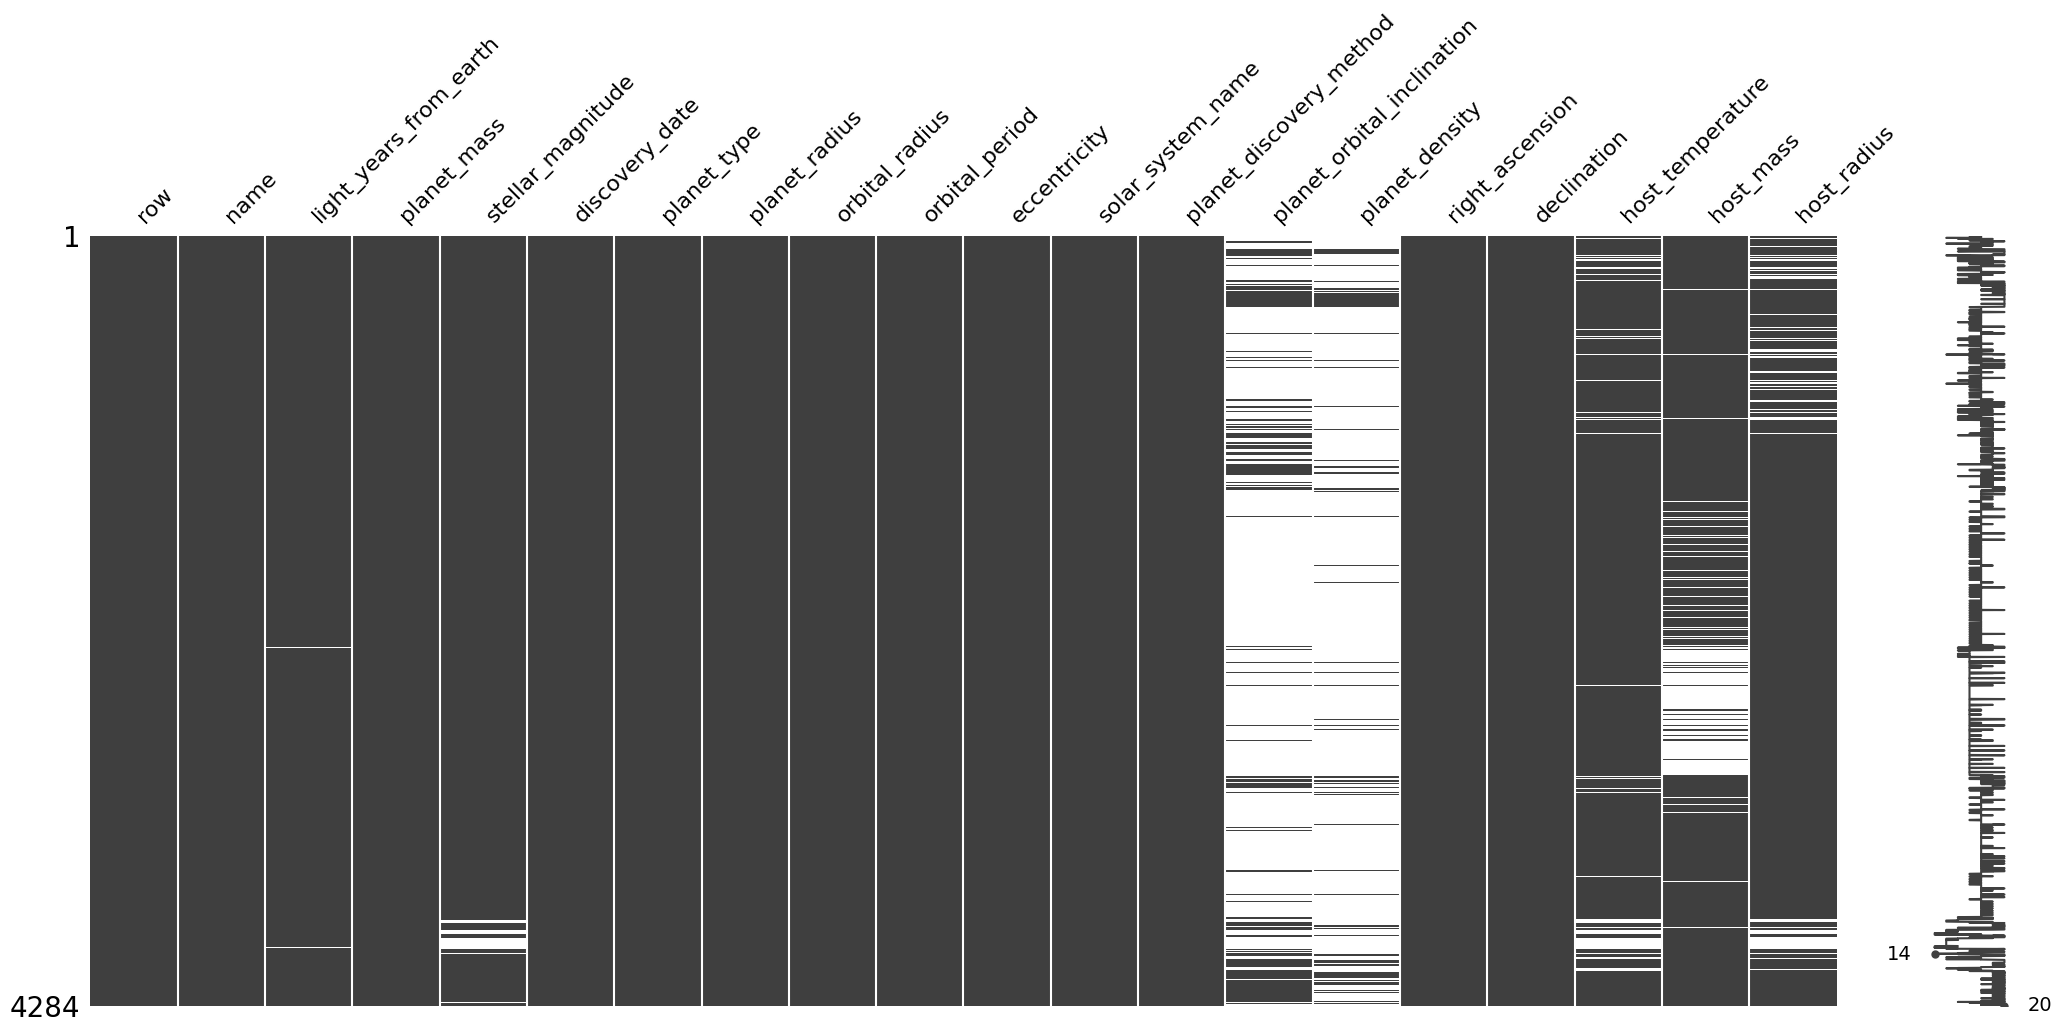

In [8]:
msno.matrix(data)

<AxesSubplot: >

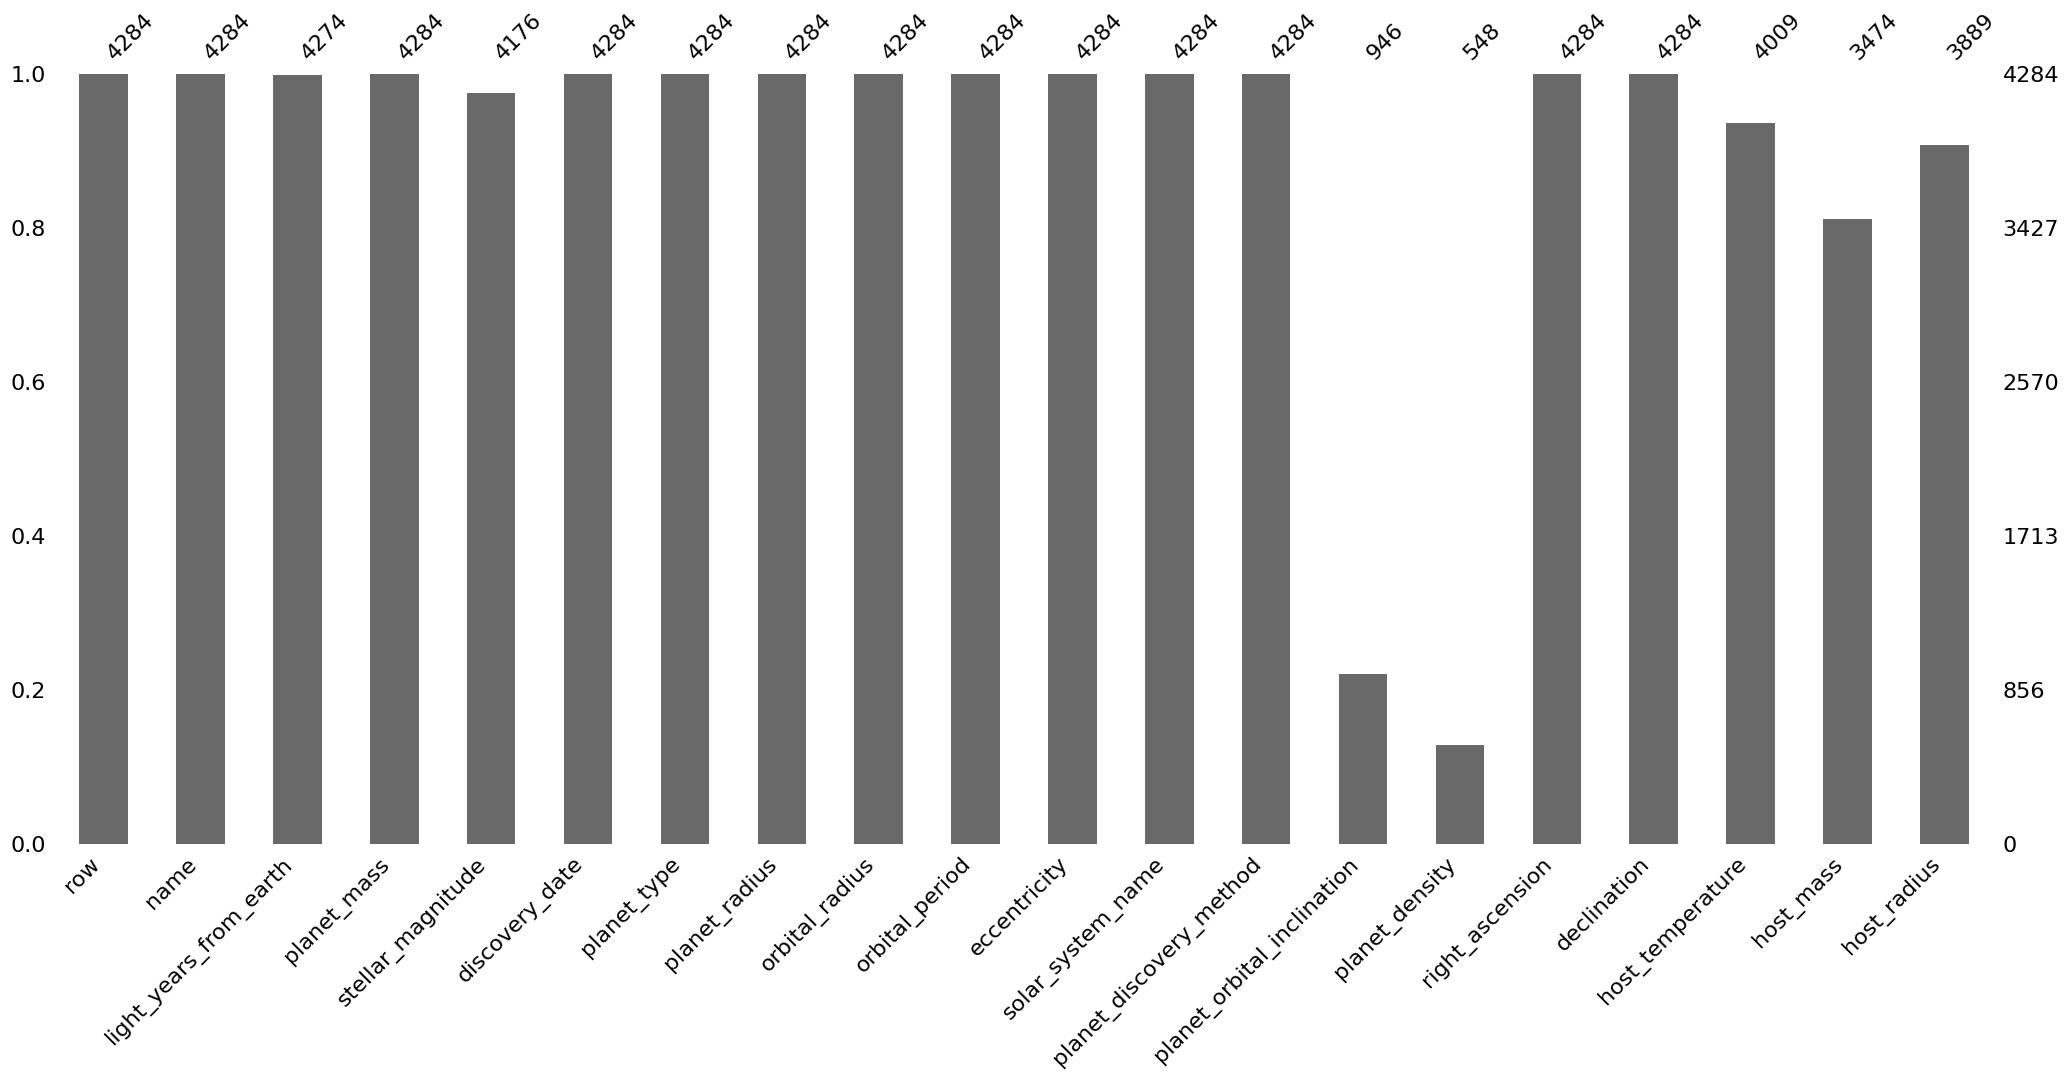

In [10]:
msno.bar(data)

Despues de la primera limpieza quedaria esto:

In [143]:
data = pd.read_csv("../csv/df_keplers.csv")
data.shape

(2376, 20)

In [8]:
def eliminar_columnas(df, columna):
    return df.drop( columna, axis=1, inplace = True)

In [41]:
data.rename(columns = {"split" : "indice masa"}, inplace = True)

In [20]:
eliminar_columnas(data,"declination")

In [152]:
data.to_csv("df_keplers.csv")
data.head()

,Unnamed: 0,index,row,name,light years from earth,planet mass,stellar magnitude,discovery date,planet type,planet radius,orbital period,solar system name,planet discovery method,host temperature (Cº),host mass,host radius,Tª type,distance type,planet radius [0],indice masa
0,0,0,1419,Kepler-1000 b,3017.0,20.3 Earths,13.192,2016,Neptune-like,0.425 x Jupiter,120 days,Kepler-10,Transit,2773.333333,0.91,1.06,muy caliente,criogenia,0.425,20.3
1,1,1,1420,Kepler-1001 b,3291.0,10.1 Earths,15.330,2016,Neptune-like,0.281 x Jupiter,14.3 days,Kepler-10,Transit,2773.333333,0.91,1.06,muy caliente,criogenia,0.281,10.1
2,2,2,1421,Kepler-1001 c,3291.0,3.11 Earths,15.330,2020,Super Earth,1.578 x Earth,9.2 days,Kepler-100,Transit,2838.333333,1.08,1.49,muy caliente,criogenia,1.578,3.11
3,3,3,1422,Kepler-1002 b,1386.0,3.57 Earths,11.647,2016,Super Earth,1.71 x Earth,4.3 days,Kepler-100,Transit,2838.333333,1.08,1.49,muy caliente,criogenia,1.71,3.57
4,4,4,1423,Kepler-1003 b,2848.0,3.82 Earths,14.023,2016,Super Earth,1.78 x Earth,3.6 days,Kepler-100,Transit,2838.333333,1.08,1.49,muy caliente,criogenia,1.78,3.82


In [151]:
data.shape

(2376, 20)

<AxesSubplot: >

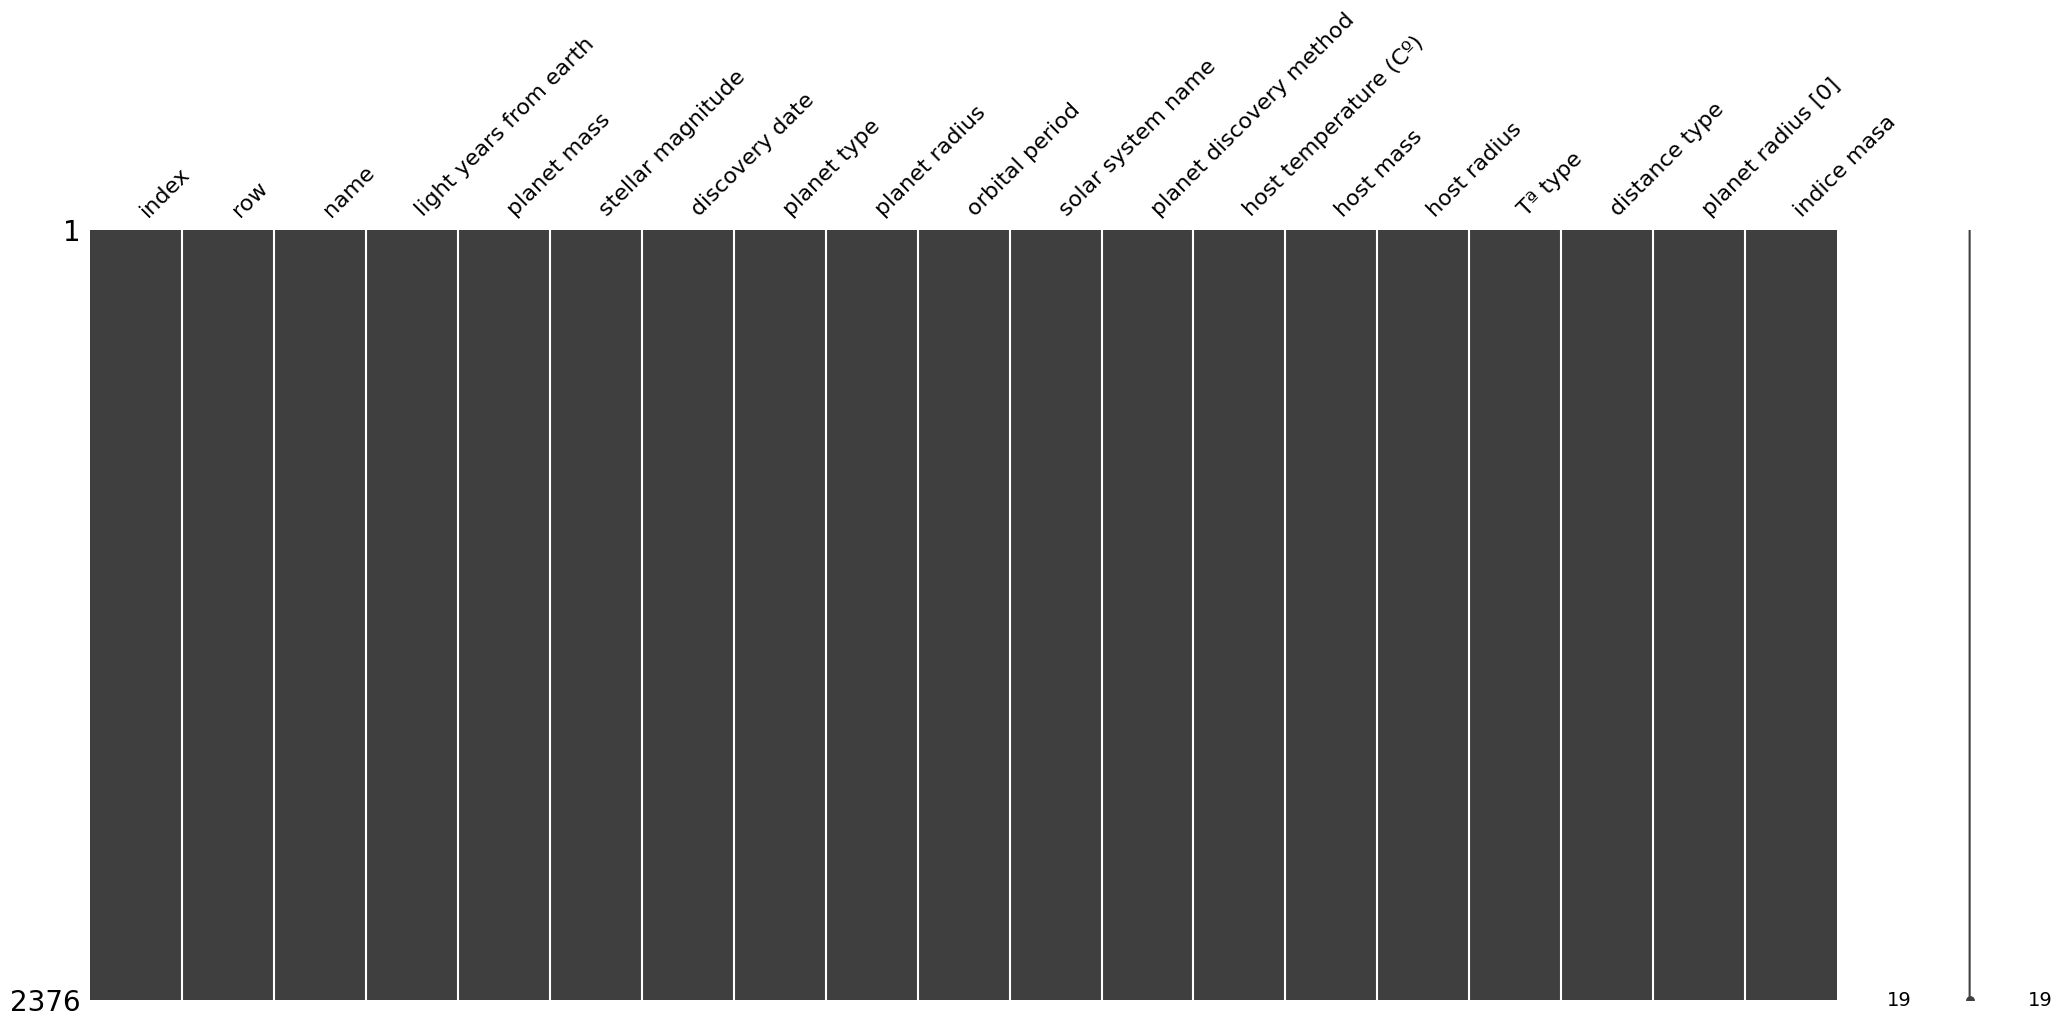

In [52]:
msno.matrix(data)

In [38]:
def limpiar_primer(i):
    return i.split()[0]

In [65]:
df["split"]=df["planet mass"].apply(limpiar_primer)

In [77]:
def eliminar_columnas(df, columna):
    return df.drop( columna, axis=1, inplace = True)

In [194]:
eliminar_columnas(data,"Unnamed: 0")

In [99]:
df["host temperature (Cº)"].describe()

count       5.000000
mean     2812.333333
std        35.601966
min      2773.333333
25%      2773.333333
50%      2838.333333
75%      2838.333333
max      2838.333333
Name: host temperature (Cº), dtype: float64

In [62]:
def abrir_csv(camino):
     pd.read_csv(camino)
     return pd.read_csv(camino).head()

In [107]:
scraping = abrir_csv("../csv/scraping.csv")

(5, 20)

In [117]:
df.rename(columns = {"koi_prad" : "radio planeta"}, inplace = True)

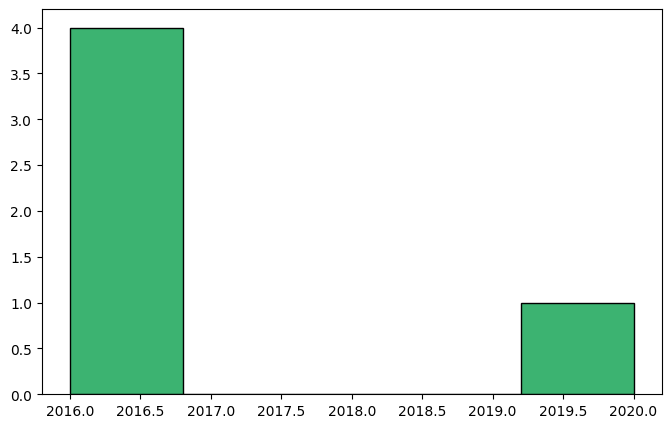

In [71]:
plt.figure(figsize = (8,5))
plt.hist(df["discovery date_x"], edgecolor = "black",
                              facecolor = "mediumseagreen",
                            bins = 5)
plt.show();

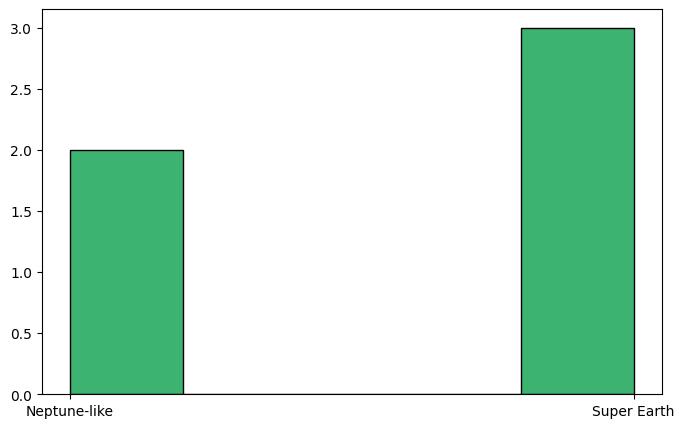

In [73]:
plt.figure(figsize = (8,5))
plt.hist(df["planet type"], edgecolor = "black",
                              facecolor = "mediumseagreen",
                            bins = 5)
plt.show();

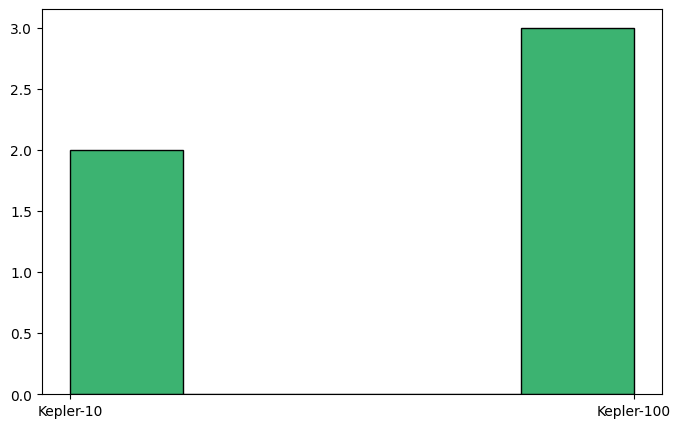

In [91]:
plt.figure(figsize = (8,5))
plt.hist(df["solar system name"], edgecolor = "black",
                              facecolor = "mediumseagreen",
                            bins = 5)
plt.show();

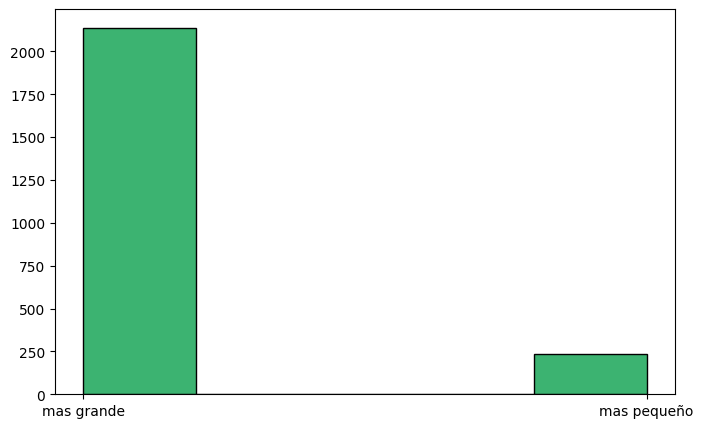

In [212]:
plt.figure(figsize = (8,5))
plt.hist(data["tipo tamaño"], edgecolor = "black",
                              facecolor = "mediumseagreen",
                            bins = 5)
plt.show();

In [210]:
data.head()

,index,row,name,light years from earth,planet mass,stellar magnitude,discovery date,planet type,planet radius,orbital period,solar system name,planet discovery method,host temperature (Cº),host mass,host radius,Tª type,distance type,planet radius [0],indice masa,tipo tamaño
0,0,1419,Kepler-1000 b,3017.0,20.3 Earths,13.192,2016,Neptune-like,0.425 x Jupiter,120 days,Kepler-10,Transit,898.786008,0.91,1.06,muy caliente,criogenia,0.425,20.3,mas grande
1,1,1420,Kepler-1001 b,3291.0,10.1 Earths,15.330,2016,Neptune-like,0.281 x Jupiter,14.3 days,Kepler-10,Transit,898.786008,0.91,1.06,muy caliente,criogenia,0.281,10.1,mas grande
2,2,1421,Kepler-1001 c,3291.0,3.11 Earths,15.330,2020,Super Earth,1.578 x Earth,9.2 days,Kepler-100,Transit,918.847737,1.08,1.49,muy caliente,criogenia,1.578,3.11,mas grande
3,3,1422,Kepler-1002 b,1386.0,3.57 Earths,11.647,2016,Super Earth,1.71 x Earth,4.3 days,Kepler-100,Transit,918.847737,1.08,1.49,muy caliente,criogenia,1.71,3.57,mas grande
4,4,1423,Kepler-1003 b,2848.0,3.82 Earths,14.023,2016,Super Earth,1.78 x Earth,3.6 days,Kepler-100,Transit,918.847737,1.08,1.49,muy caliente,criogenia,1.78,3.82,mas grande


In [223]:
definitiva.to_csv("definitivo.csv")

In [178]:
data["host temperature (Cº)"] = definitiva["host_temperature"]

In [16]:
temperatura = []
for i in df["host temperature (Cº)"]:
    x = ((i - 32)*5)/9
    temperatura.append(x)

In [17]:
df["host temperature (Cº)"] = temperatura

In [20]:
df["tipo tamaño"] = tamaño

In [18]:
tamaño = []
for i in df["indice masa"]:
    if i >= "1":
        tamaño.append("mas grande")
    else:
        tamaño.append("mas pequeño")



In [214]:
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
mask

C:\Users\pedro\AppData\Local\Temp\ipykernel_10932\2235876757.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
C:\Users\pedro\AppData\Local\Temp\ipykernel_10932\2235876757.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))


array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True]])

C:\Users\pedro\AppData\Local\Temp\ipykernel_10932\1398010726.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),


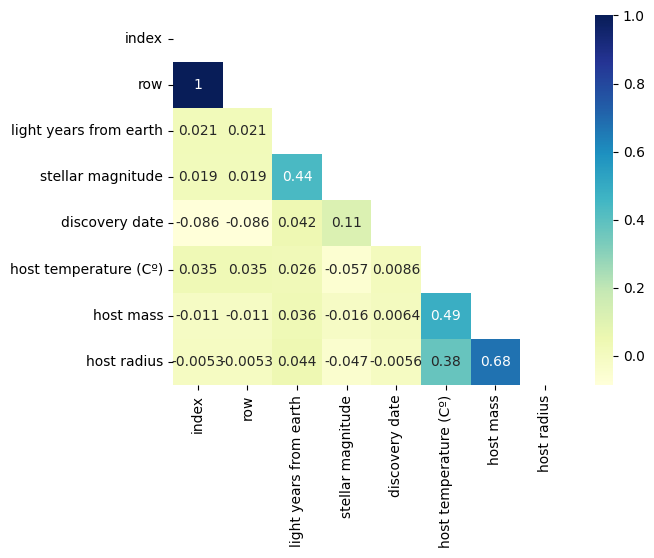

In [215]:
sns.heatmap(data.corr(),
            cmap = "YlGnBu", 
            mask = mask, 
           annot = True); 

In [2]:
definitiva = data.merge(scraping,how = "inner", on = "name")

NameError: name 'data' is not defined

In [23]:
def eliminar_columnas(df, columna):
    return df.drop( columna, axis=1, inplace = True)

In [25]:
eliminar_columnas(df,"Unnamed: 0")

In [26]:
#df = pd.read_csv("../csv/df_keplers.csv")
df.head()

,index,row,name,light years from earth,planet mass,stellar magnitude,discovery date,planet type,planet radius,orbital period,solar system name,planet discovery method,host temperature (Cº),host mass,host radius,Tª type,distance type,planet radius [0],indice masa,tipo tamaño
0,0,1419,Kepler-1000 b,3017.0,20.3 Earths,13.192,2016,Neptune-like,0.425 x Jupiter,120 days,Kepler-10,Transit,1522.962963,0.91,1.06,muy caliente,criogenia,0.425,20.3,mas grande
1,1,1420,Kepler-1001 b,3291.0,10.1 Earths,15.330,2016,Neptune-like,0.281 x Jupiter,14.3 days,Kepler-10,Transit,1522.962963,0.91,1.06,muy caliente,criogenia,0.281,10.1,mas grande
2,2,1421,Kepler-1001 c,3291.0,3.11 Earths,15.330,2020,Super Earth,1.578 x Earth,9.2 days,Kepler-100,Transit,1559.074074,1.08,1.49,muy caliente,criogenia,1.578,3.11,mas grande
3,3,1422,Kepler-1002 b,1386.0,3.57 Earths,11.647,2016,Super Earth,1.71 x Earth,4.3 days,Kepler-100,Transit,1559.074074,1.08,1.49,muy caliente,criogenia,1.71,3.57,mas grande
4,4,1423,Kepler-1003 b,2848.0,3.82 Earths,14.023,2016,Super Earth,1.78 x Earth,3.6 days,Kepler-100,Transit,1559.074074,1.08,1.49,muy caliente,criogenia,1.78,3.82,mas grande


In [13]:
scraping = pd.read_csv("../csv/scraping.csv")
scraping.shape

(2329, 4)

In [15]:
scraping

,Unnamed: 0,name,description,discovery date
0,0,Kepler-1000 b,Kepler-1000 b is a Neptune-like exoplanet that...,2016
1,1,Kepler-1001 b,Kepler-1001 b is a Neptune-like exoplanet that...,2016
2,2,Kepler-1001 c,Kepler-1001 b is a Neptune-like exoplanet that...,2016
3,3,Kepler-1002 b,Kepler-1002 b is a super Earth exoplanet that ...,2016
4,4,Kepler-1003 b,Kepler-1003 b is a super Earth exoplanet that ...,2016
...,...,...,...,...
2324,2324,Kepler-999 b,Kepler-996 b is a super Earth exoplanet that o...,2014
2325,2325,Kepler-99 b,Kepler-997 b is a super Earth exoplanet that o...,2010
2326,2326,Kepler-9 b,Kepler-998 b is a Neptune-like exoplanet that ...,2010
2327,2327,Kepler-9 c,Kepler-999 b is a Neptune-like exoplanet that ...,2010


In [27]:
definitiva = df.merge(scraping,how = "inner", on = "name")

In [29]:
definitiva.to_csv("definitivo.csv")